In [47]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.8 MB/s eta 0:00:00
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68137 sha256=616db373a0e6acff2c12ee819133ba060bd6eafec280755369eeca53a9b2bab2
  Stored in directory: /Users/tht13/Library/Caches/pip/wheels/94/4d/ca/df6b7427d49df660c50c351242463476c3f7935c359402e42b
Successfully built dtreeviz

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn import tree
from dtreeviz.trees import dtreeviz

In [5]:
corr_file = "PdPPEcorrelationlog_modified.xlsx"

In [6]:
corr_data = pd.read_excel(corr_file,
                       header=0,
                       index_col=False,
                       keep_default_na=True
                       )


corr_data.head(5)

,koide ID,log_fluor_expr,vmin_vmin_boltz,vmin_r_boltz,fmo_e_homo_boltz,fmo_e_lumo_boltz,fmo_mu_boltz,fmo_eta_boltz,fmo_omega_boltz,somo_ra_boltz,...,sterimol_burB5_boltz,sterimol_burB5_min,sterimol_burB5_max,sterimol_burB5_delta,sterimol_burB5_vburminconf,sterimol_burL_boltz,sterimol_burL_min,sterimol_burL_max,sterimol_burL_delta,sterimol_burL_vburminconf
0,1,0.107210,-0.043479,1.820164,-0.222589,-0.028099,-0.125344,0.194489,0.040391,0.058946,...,6.042971,6.042803,6.210989,0.168186,6.210989,6.778337,6.776344,7.604455,0.828112,7.604455
1,2,0.296665,-0.037038,1.871216,-0.242356,-0.059912,-0.151134,0.182444,0.062602,0.034859,...,6.497699,6.034963,7.308214,1.273251,6.037221,6.967081,6.949840,6.990305,0.040465,6.990305
2,3,0.594393,-0.047461,1.860160,-0.221150,0.032800,-0.094175,0.253950,0.017462,0.137370,...,3.511176,3.511176,3.511176,0.000000,3.511176,7.299284,7.299284,7.299284,0.000000,7.299284
3,5,0.012837,-0.039828,1.919713,-0.227681,-0.026131,-0.126906,0.201549,0.039969,0.074128,...,5.934360,5.835709,6.026880,0.191171,5.863930,6.779832,6.518659,6.858913,0.340254,6.697037
4,7,0.181844,-0.026401,1.900154,-0.254050,-0.079880,-0.166965,0.174170,0.080029,0.005780,...,6.034069,6.029424,6.034070,0.004646,6.034070,6.910345,6.910344,6.919218,0.008874,6.910344


In [7]:
corr_data = corr_data.loc[:, corr_data.columns!='koide ID']

In [71]:
y = corr_data['log_fluor_expr']
X = corr_data.iloc[:, 1:191]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_test.shape)
print(y_train.shape)

(5, 190)
(17,)


In [63]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [64]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [65]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.09388301730900386
Mean Squared Error: 0.01439212154122759
Root Mean Squared Error: 0.11996716859719408


In [66]:
len(regressor)

20

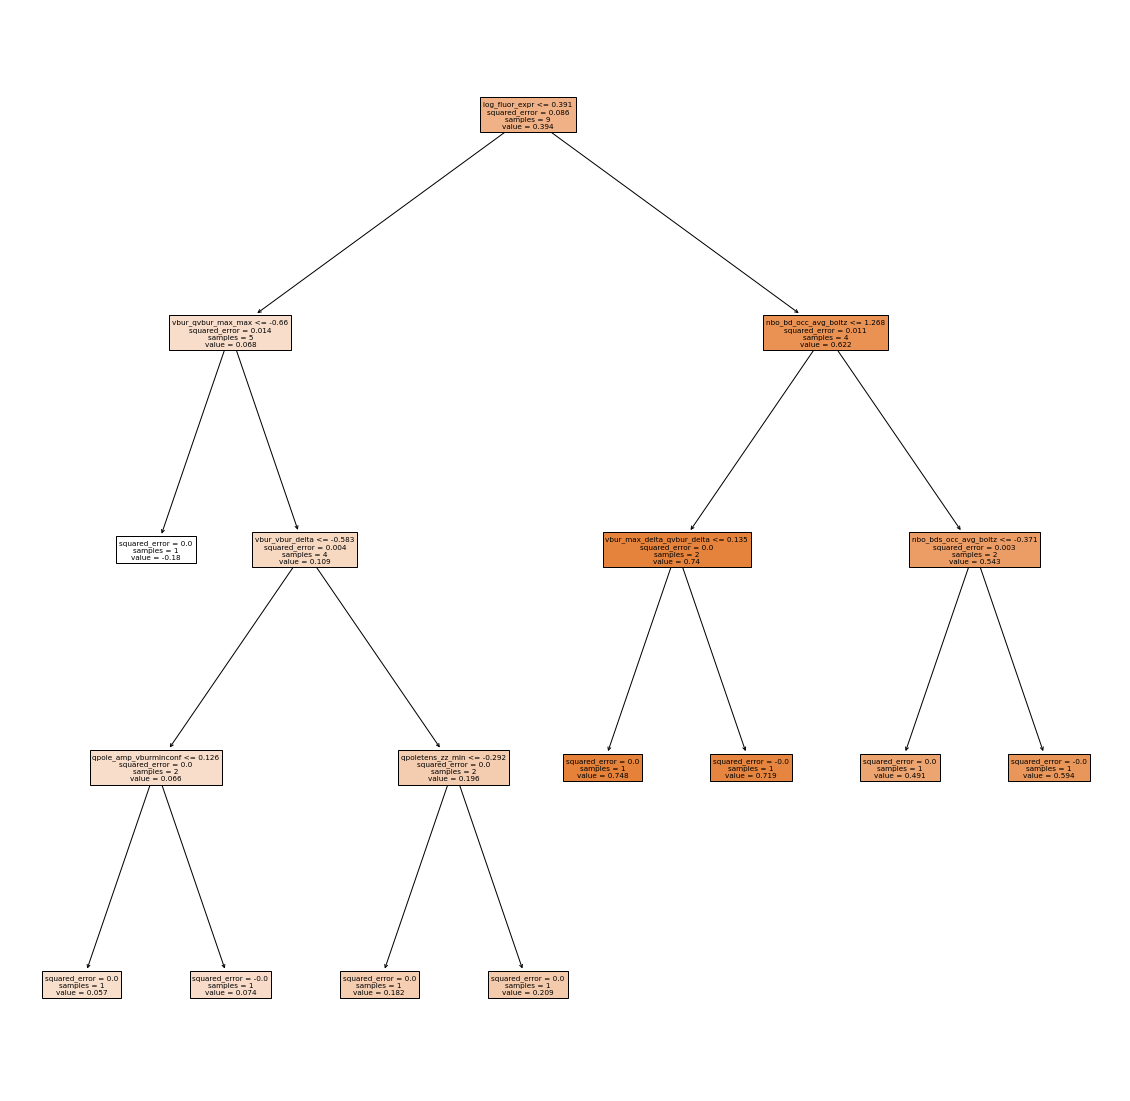

In [67]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(regressor.estimators_[0], feature_names=X.columns, filled=True)